# 词袋模型

词袋模型（Bag of Words, BoW）是一种用于文本表示的经典方法。它将文本中的词汇转换为向量形式，忽略词序和语法，仅保留词频或其他统计信息。词袋模型的核心在于构建特征矩阵。

In [1]:
# 输入多句
sentences = [
    "Thomas Jefferson began building Monticello at the age of 26.",
    "Jefferson was the third president of the United States.",
    "Monticello is located in Virginia."
]

# 步骤 1: 对所有句子进行分词
all_words = []
for sentence in sentences:
    all_words.extend(sentence.split())  # 将所有句子的单词加入列表

# 步骤 2: 创建全局词汇表（唯一单词）
vocab = list(set(all_words))  # 去重，得到全局唯一单词列表

# 步骤 3: 为词汇表中的每个单词分配一个索引
word_to_index = {word: idx for idx, word in enumerate(vocab)}

# 步骤 4: 初始化词袋向量矩阵
bow_matrix = []

# 步骤 5: 为每个句子生成词袋向量
for sentence in sentences:
    bow_vector = [0] * len(vocab)  # 初始化零向量
    for word in sentence.split():
        bow_vector[word_to_index[word]] += 1  # 根据单词的索引增加计数
    bow_matrix.append(bow_vector)  # 将当前句子的向量加入矩阵

# 步骤 6: 打印结果
print("词汇表:", vocab)
print("\n单词与索引的映射:", word_to_index)
print("\n词袋向量矩阵:")
for i, vector in enumerate(bow_matrix):
    print(f"句子 {i + 1}: {vector}")

词汇表: ['Virginia.', '26.', 'of', 'age', 'United', 'Thomas', 'located', 'began', 'Jefferson', 'president', 'States.', 'was', 'Monticello', 'the', 'is', 'in', 'building', 'at', 'third']

单词与索引的映射: {'Virginia.': 0, '26.': 1, 'of': 2, 'age': 3, 'United': 4, 'Thomas': 5, 'located': 6, 'began': 7, 'Jefferson': 8, 'president': 9, 'States.': 10, 'was': 11, 'Monticello': 12, 'the': 13, 'is': 14, 'in': 15, 'building': 16, 'at': 17, 'third': 18}

词袋向量矩阵:
句子 1: [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0]
句子 2: [0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1]
句子 3: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]


## 独热向量

我们构建每个词的数值向量表示，这些向量称为独热向量(one-hot vector)。这些向量构成的序列能够以向量序列(数字构成的表格)的方式完美捕捉原始文本。

In [10]:
import numpy as np

# 输入句子
sentence = """Thomas Jefferson began building Monticello at the age of 26."""

# 步骤 1: 将句子分词
words = sentence.split()

# 步骤 2: 创建词汇表（提取唯一单词）
vocab = list(set(words))

# 步骤 3: 为词汇表中的每个单词分配一个索引
word_to_index = {word: idx for idx, word in enumerate(vocab)}

# 步骤 4: 使用 numpy 创建独热矩阵
vocab_size = len(vocab)  # 词汇表大小
one_hot_matrix = np.zeros((len(words), vocab_size), dtype=int)  # 初始化零矩阵

# 将每个单词编码为独热向量
for i, word in enumerate(words):
    one_hot_matrix[i, word_to_index[word]] = 1  # 根据单词索引设置对应位置为 1

# 步骤 5: 打印结果
print("词汇表:", vocab)
print("\n单词与索引的映射:", word_to_index)
print("\n独热矩阵:\n", one_hot_matrix)

词汇表: ['the', 'of', 'Thomas', '26.', 'Monticello', 'began', 'at', 'Jefferson', 'age', 'building']

单词与索引的映射: {'the': 0, 'of': 1, 'Thomas': 2, '26.': 3, 'Monticello': 4, 'began': 5, 'at': 6, 'Jefferson': 7, 'age': 8, 'building': 9}

独热矩阵:
 [[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]]


## TF-IDF

TF-IDF是一种用于信息检索与数据挖掘的常用加权技术，用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度。

- **TF（Term Frequency）词频**，某个词在文章中出现的次数或频率。如果某篇文章中的某个词出现多次，那这个词可能是比较重要的词。
- **IDF（Inverse Document Frequency）逆文档频率**，指词语“权重”的度量。在词频的基础上，如果一个词在多篇文档中词频较低，也就表示这是一个比较少见的词，但却在某一篇文章中出现了很多次，**则这个词IDF值越大，在这篇文章中的“权重”越大**。即，当一个词越常见，其IDF值越低。
- 当计算出TF和IDF值后，**两数相乘即为TF-IDF**：**某词的TF-IDF值越高，说明其在这篇文章中的重要性越高，越有可能是文章的关键词。**

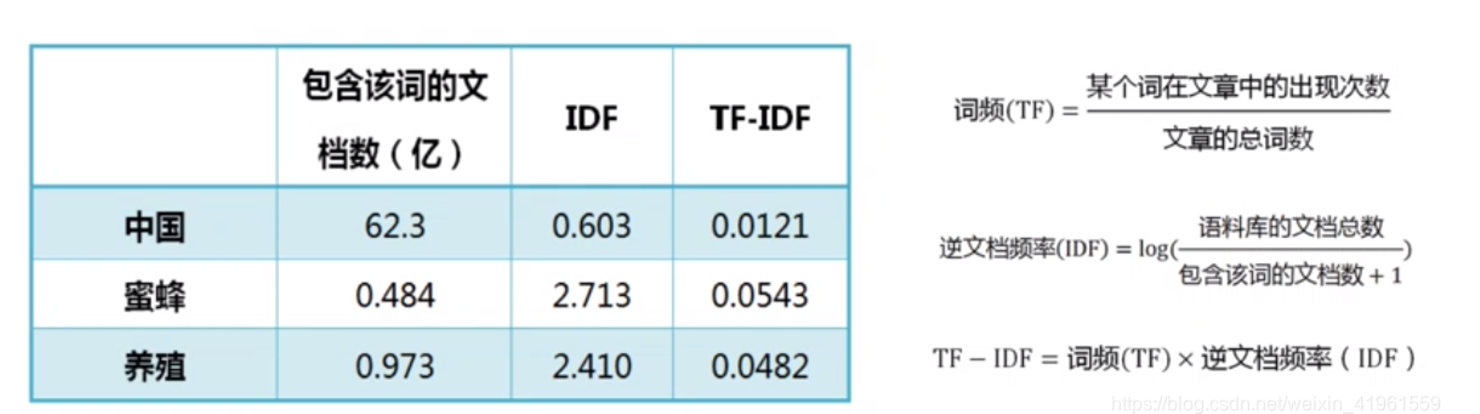

In [6]:
import math
from collections import Counter

# 示例文档
documents = [
    "我喜欢机器学习和自然语言处理。",
    "自然语言处理是人工智能的一个重要领域。",
    "机器学习和深度学习是非常重要的技术。"
]

# 分词函数（可以换成 jieba 分词）
def tokenize(text):
    return jieba.lcut(text) # 简单分词，用空格分隔

# 计算词频 (TF)
def compute_tf(word_list):
    tf_dict = Counter(word_list)
    total_words = len(word_list)
    return {word: count / total_words for word, count in tf_dict.items()}

# 计算逆文档频率 (IDF)
def compute_idf(documents):
    N = len(documents)
    idf_dict = {}
    all_words = set(word for doc in documents for word in doc)
    for word in all_words:
        containing_docs = sum(1 for doc in documents if word in doc)
        idf_dict[word] = math.log(N / (1 + containing_docs))  # 加 1 平滑
    return idf_dict

# 计算 TF-IDF
def compute_tfidf(tf_dict, idf_dict):
    return {word: tf * idf_dict[word] for word, tf in tf_dict.items()}

# 主流程
def tfidf_pipeline(documents):
    # 分词
    tokenized_documents = [tokenize(doc) for doc in documents]
    
    # 计算 IDF
    idf_dict = compute_idf(tokenized_documents)
    
    # 计算每个文档的 TF 和 TF-IDF
    tfidf_documents = []
    for doc in tokenized_documents:
        tf_dict = compute_tf(doc)
        tfidf = compute_tfidf(tf_dict, idf_dict)
        tfidf_documents.append(tfidf)
    
    return tfidf_documents, idf_dict

# 运行 TF-IDF 管道
tfidf_result, idf_values = tfidf_pipeline(documents)

# 输出结果
print("IDF 值:")
for word, idf in idf_values.items():
    print(f"{word}: {idf:.4f}")

print("\nTF-IDF 值:")
for i, tfidf in enumerate(tfidf_result):
    print(f"文档 {i + 1}:")
    for word, value in tfidf.items():
        print(f"  {word}: {value:.4f}")


IDF 值:
学习: 0.0000
处理: 0.0000
和: 0.0000
领域: 0.4055
喜欢: 0.4055
机器: 0.0000
技术: 0.4055
深度: 0.4055
一个: 0.4055
的: 0.0000
自然语言: 0.0000
我: 0.4055
是: 0.0000
。: -0.2877
重要: 0.0000
非常: 0.4055
人工智能: 0.4055

TF-IDF 值:
文档 1:
  我: 0.0507
  喜欢: 0.0507
  机器: 0.0000
  学习: 0.0000
  和: 0.0000
  自然语言: 0.0000
  处理: 0.0000
  。: -0.0360
文档 2:
  自然语言: 0.0000
  处理: 0.0000
  是: 0.0000
  人工智能: 0.0451
  的: 0.0000
  一个: 0.0451
  重要: 0.0000
  领域: 0.0451
  。: -0.0320
文档 3:
  机器: 0.0000
  学习: 0.0000
  和: 0.0000
  深度: 0.0369
  是: 0.0000
  非常: 0.0369
  重要: 0.0000
  的: 0.0000
  技术: 0.0369
  。: -0.0262


In [2]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer

# 示例文本数据
documents = [
    "我喜欢机器学习和自然语言处理。",
    "自然语言处理是人工智能的一个重要领域。",
    "机器学习和深度学习是非常重要的技术。"
]

# 使用 jieba 对中文文本进行分词
def jieba_tokenize(text):
    return ' '.join(jieba.lcut(text))

# 对所有文档进行分词
tokenized_documents = [jieba_tokenize(doc) for doc in documents]

# 初始化 TfidfVectorizer，并使用自定义分词器
vectorizer = TfidfVectorizer()

# 使用 TF-IDF 对分词后的文本进行向量化
tfidf_matrix = vectorizer.fit_transform(tokenized_documents)

# 输出词汇表
print("词汇表:")
print(vectorizer.vocabulary_)

# 输出 TF-IDF 特征矩阵
print("\nTF-IDF 特征矩阵:")
print(tfidf_matrix.toarray())

# 查看每个词的 IDF 值
print("\n词的 IDF 值:")
print(dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_)))

# 查询特定词语的 TF-IDF 值
print("\n查询特定词语的 TF-IDF 值:")
feature_names = vectorizer.get_feature_names_out()
for i, doc in enumerate(documents):
    print(f"文档 {i + 1}:")
    for j, word in enumerate(feature_names):
        print(f"  {word}: {tfidf_matrix[i, j]:.4f}")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\caoyuyu\AppData\Local\Temp\jieba.cache
Loading model cost 1.022 seconds.
Prefix dict has been built successfully.


词汇表:
{'喜欢': 2, '机器': 6, '学习': 4, '自然语言': 8, '处理': 3, '人工智能': 1, '一个': 0, '重要': 9, '领域': 11, '深度': 7, '非常': 10, '技术': 5}

TF-IDF 特征矩阵:
[[0.         0.         0.54935123 0.41779577 0.41779577 0.
  0.41779577 0.         0.41779577 0.         0.         0.        ]
 [0.45954803 0.45954803 0.         0.34949812 0.         0.
  0.         0.         0.34949812 0.34949812 0.         0.45954803]
 [0.         0.         0.         0.         0.59796874 0.39312851
  0.29898437 0.39312851 0.         0.29898437 0.39312851 0.        ]]

词的 IDF 值:
{'一个': 1.6931471805599454, '人工智能': 1.6931471805599454, '喜欢': 1.6931471805599454, '处理': 1.2876820724517808, '学习': 1.2876820724517808, '技术': 1.6931471805599454, '机器': 1.2876820724517808, '深度': 1.6931471805599454, '自然语言': 1.2876820724517808, '重要': 1.2876820724517808, '非常': 1.6931471805599454, '领域': 1.6931471805599454}

查询特定词语的 TF-IDF 值:
文档 1:
  一个: 0.0000
  人工智能: 0.0000
  喜欢: 0.5494
  处理: 0.4178
  学习: 0.4178
  技术: 0.0000
  机器: 0.4178
  深度: 0.0000
  自然语言: 0.4

### 文本相似度

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import jieba

# 示例文本数据
documents = [
    "我喜欢机器学习和自然语言处理。",
    "自然语言处理是人工智能的一个重要领域。",
    "机器学习和深度学习是非常重要的技术。",
    "我喜欢看电影，也喜欢听音乐。"
]

# 使用 jieba 对中文文本进行分词
def jieba_tokenize(text):
    return ' '.join(jieba.lcut(text))

# 对所有文档进行分词
tokenized_documents = [jieba_tokenize(doc) for doc in documents]

# 初始化 TfidfVectorizer
vectorizer = TfidfVectorizer()

# 生成 TF-IDF 特征矩阵
tfidf_matrix = vectorizer.fit_transform(tokenized_documents)

# 计算余弦相似度
cosine_similarities = cosine_similarity(tfidf_matrix)

# 输出结果
print("TF-IDF 特征矩阵:")
print(tfidf_matrix.toarray())

print("\n余弦相似度矩阵:")
print(cosine_similarities)

# 查询两个具体文档的相似度
doc1, doc2 = 0, 1  # 文档索引
print(f"\n文档 {doc1 + 1} 和 文档 {doc2 + 1} 的相似度: {cosine_similarities[doc1, doc2]:.4f}")

TF-IDF 特征矩阵:
[[0.         0.         0.4472136  0.4472136  0.4472136  0.
  0.4472136  0.         0.         0.4472136  0.         0.
  0.         0.        ]
 [0.4533864  0.4533864  0.         0.35745504 0.         0.
  0.         0.         0.         0.35745504 0.35745504 0.
  0.         0.4533864 ]
 [0.         0.         0.         0.         0.60784064 0.38548439
  0.30392032 0.38548439 0.         0.         0.30392032 0.38548439
  0.         0.        ]
 [0.         0.         0.7444497  0.         0.         0.
  0.         0.         0.47212003 0.         0.         0.
  0.47212003 0.        ]]

余弦相似度矩阵:
[[1.         0.31971751 0.4077519  0.33292803]
 [0.31971751 1.         0.10863785 0.        ]
 [0.4077519  0.10863785 1.         0.        ]
 [0.33292803 0.         0.         1.        ]]

文档 1 和 文档 2 的相似度: 0.3197


### 关键词提取

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 示例文档
documents = [
    "我喜欢机器学习和自然语言处理。",
    "自然语言处理是人工智能的一个重要领域。",
    "机器学习和深度学习是非常重要的技术。"
]

# 分词器：使用 jieba 分词
import jieba

def custom_tokenizer(text):
    return jieba.lcut(text)

# 提取关键词
def extract_keywords_tfidf(documents, top_k=5):
    vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, stop_words=["的", "是", "一个", "非常"])
    tfidf_matrix = vectorizer.fit_transform(documents)
    feature_names = vectorizer.get_feature_names_out()
    keywords_per_doc = []
    
    for i, row in enumerate(tfidf_matrix.toarray()):
        top_indices = row.argsort()[-top_k:][::-1]
        keywords = [(feature_names[idx], row[idx]) for idx in top_indices]
        keywords_per_doc.append(keywords)
    
    return keywords_per_doc

# 提取关键词
keywords_tfidf = extract_keywords_tfidf(documents)
for i, keywords in enumerate(keywords_tfidf):
    print(f"文档 {i + 1} 的关键词:")
    for word, score in keywords:
        print(f"  {word}: {score:.4f}")

文档 1 的关键词:
  我: 0.4368
  喜欢: 0.4368
  自然语言: 0.3322
  机器: 0.3322
  学习: 0.3322
文档 2 的关键词:
  领域: 0.4948
  人工智能: 0.4948
  重要: 0.3763
  自然语言: 0.3763
  处理: 0.3763
文档 3 的关键词:
  学习: 0.6014
  深度: 0.3954
  技术: 0.3954
  重要: 0.3007
  机器: 0.3007


D:\Anaconda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## TextRank

TextRank算法是一种用于文本的基于图的排序算法。

- 基本思想：来源于谷歌的PageRank算法，通过把文本分割成若干组成单元（单词、句子）并建立图模型，利用投票机制对文本中的重要成分进行排序。
- 优点：不需要事先对多篇文档进行学习训练，仅利用单篇文档本身的信息即可实现关键词提取、文摘，因其简洁有效而得到广泛应用。

PageRank最开始用来计算网页的重要性。整个互联网可以看做一张有向图，节点是网页。如果网页A存在到网页B的链接，那么有一条从网页B指向网页A的有向边。

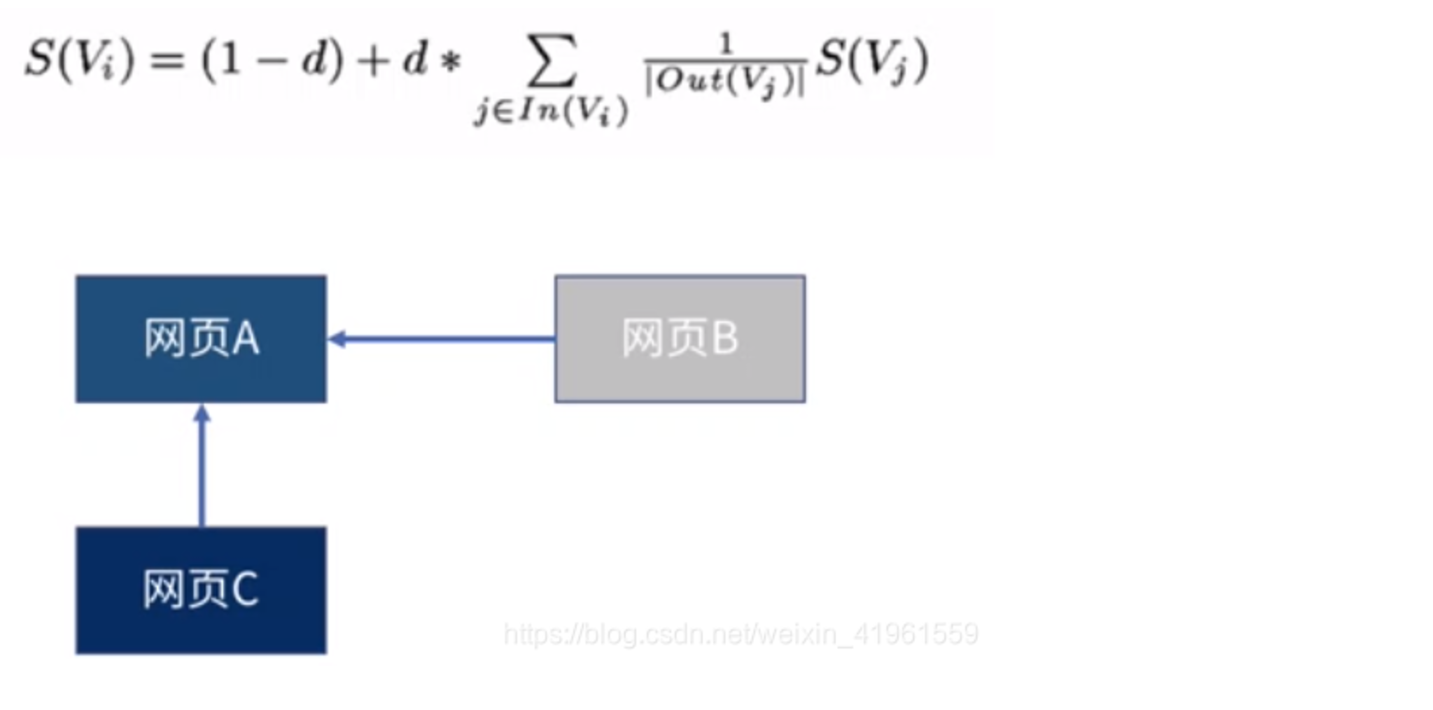

其中，S(Vi)是网页i的重要性（PR值），d是阻尼系数，一般设置为0.85，In(Vi)是存在指向网页i的链接的网页集合，Out(Vj)是网页j中的链接存在链接指向网页的集合，|Out(Vj)|是集合中元素的个数。

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import jieba
from collections import defaultdict
import numpy as np

# 示例文档
documents = [
    "我喜欢机器学习和自然语言处理。",
    "自然语言处理是人工智能的一个重要领域。",
    "机器学习和深度学习是非常重要的技术。"
]

# 停用词表
stopwords = set(["的", "是", "一个", "非常"])

# 文本预处理：分词和去停用词
def preprocess(text):
    words = jieba.lcut(text)
    return [word for word in words if word not in stopwords and len(word) > 1]

# TextRank 关键词提取
def textrank_keywords(doc, top_k=5, window_size=2):
    words = preprocess(doc)
    graph = build_word_graph(words, window_size)
    scores = calculate_textrank(graph)
    sorted_keywords = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return [keyword for keyword, _ in sorted_keywords[:top_k]]

# 构建词图
def build_word_graph(words, window_size=2):
    graph = defaultdict(set)
    for i, word in enumerate(words):
        for j in range(max(i - window_size, 0), min(i + window_size + 1, len(words))):
            if i != j:
                graph[word].add(words[j])
    return graph

# 计算 TextRank
def calculate_textrank(graph, d=0.85, max_iter=100, tol=1e-4):
    scores = {node: 1.0 for node in graph}
    for _ in range(max_iter):
        prev_scores = scores.copy()
        for node in graph:
            score_sum = sum(prev_scores[neighbor] / len(graph[neighbor]) for neighbor in graph[node])
            scores[node] = (1 - d) + d * score_sum
        # 检查收敛
        if all(abs(scores[node] - prev_scores[node]) < tol for node in graph):
            break
    return scores

# 利用 sklearn 的 CountVectorizer 构建词袋
def build_bow_with_textrank_sklearn(documents, top_k=5, window_size=2):
    # 提取每篇文档的关键词
    all_keywords = set()
    document_keywords = []
    for doc in documents:
        keywords = textrank_keywords(doc, top_k, window_size)
        document_keywords.append(keywords)
        all_keywords.update(keywords)
    
    # 利用 sklearn 的 CountVectorizer 构建词袋
    count_vectorizer = CountVectorizer(vocabulary=sorted(all_keywords), token_pattern=r"(?u)\b\w+\b")
    bow_matrix = count_vectorizer.fit_transform([" ".join(keywords) for keywords in document_keywords])
    
    return bow_matrix.toarray(), count_vectorizer.vocabulary_

# 运行 TextRank 和构建词袋模型，top_k=5
bow_matrix, vocabulary = build_bow_with_textrank_sklearn(documents, top_k=5, window_size=2)

# 输出结果
print("词汇表:")
print(vocabulary)

print("\n词袋矩阵:")
print(bow_matrix)

词汇表:
{'人工智能': 0, '喜欢': 1, '处理': 2, '学习': 3, '技术': 4, '机器': 5, '深度': 6, '自然语言': 7, '重要': 8, '领域': 9}

词袋矩阵:
[[0 1 1 1 0 1 0 1 0 0]
 [1 0 1 0 0 0 0 1 1 1]
 [0 0 0 1 1 1 1 0 1 0]]


### 关键词提取

In [9]:
import jieba
from collections import defaultdict

# 停用词表
stopwords = set(["的", "是", "一个", "非常"])

# 分词和停用词过滤
def preprocess(text):
    words = jieba.lcut(text)
    return [word for word in words if word not in stopwords and len(word) > 1]

# 构建词图
def build_word_graph(words, window_size=2):
    graph = defaultdict(set)
    for i, word in enumerate(words):
        for j in range(max(i - window_size, 0), min(i + window_size + 1, len(words))):
            if i != j:
                graph[word].add(words[j])
    return graph

# 计算 TextRank
def calculate_textrank(graph, d=0.85, max_iter=100, tol=1e-4):
    scores = {node: 1.0 for node in graph}
    for _ in range(max_iter):
        prev_scores = scores.copy()
        for node in graph:
            score_sum = sum(prev_scores[neighbor] / len(graph[neighbor]) for neighbor in graph[node])
            scores[node] = (1 - d) + d * score_sum
        if all(abs(scores[node] - prev_scores[node]) < tol for node in graph):
            break
    return scores

# 提取关键词
def extract_keywords_textrank(doc, top_k=5, window_size=2):
    words = preprocess(doc)
    graph = build_word_graph(words, window_size)
    scores = calculate_textrank(graph)
    sorted_keywords = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_keywords[:top_k]

# 提取文档关键词
for i, doc in enumerate(documents):
    keywords = extract_keywords_textrank(doc, top_k=5)
    print(f"文档 {i + 1} 的关键词:")
    for word, score in keywords:
        print(f"  {word}: {score:.4f}")

文档 1 的关键词:
  学习: 1.3853
  机器: 1.0620
  自然语言: 1.0620
  喜欢: 0.7453
  处理: 0.7453
文档 2 的关键词:
  人工智能: 1.3853
  处理: 1.0620
  重要: 1.0620
  自然语言: 0.7453
  领域: 0.7453
文档 3 的关键词:
  学习: 1.5863
  深度: 1.0030
  重要: 1.0030
  机器: 0.7038
  技术: 0.7038


## N-Gram

N-Gram 是一种常用的自然语言处理方法，用来表示文本中的连续 N 个单词或字符的组合。它是语言模型中捕捉上下文信息的一种方式。

基本概念  
N 表示组合的词或字符的数量。

- Unigram (1-Gram): 单个单词或字符。例如，"我喜欢机器学习" 被分解为 ["我", "喜欢", "机器", "学习"]。
- Bigram (2-Gram): 两个连续单词或字符的组合。例如，"我喜欢机器学习" 被分解为 ["我喜欢", "喜欢机器", "机器学习"]。
- Trigram (3-Gram): 三个连续单词或字符的组合。例如，"我喜欢机器学习" 被分解为 ["我喜欢机器", "喜欢机器学习"]。
特点：

Unigram 仅关注单词出现的频率，无法捕捉上下文关系。  
Bigram 和更高阶的 N-Gram 能够捕捉到一定的上下文信息，例如词序和搭配。

N-Gram 的作用
- 上下文建模：

捕捉文本中单词或字符的局部依赖关系。  
例如，"自然语言处理" 和 "人工智能" 是有意义的短语，而 Unigram 分词无法识别这种关联。
- 文本特征提取：

N-Gram 可以作为文本分类、聚类等任务的输入特征。  
Bigram 或 Trigram 特征更适合捕捉句子中重要的短语或语义片段。
- 关键词提取：

从文本中提取常见的短语，应用于搜索引擎、文本摘要等。
- 语言生成和纠错：

在生成模型中，N-Gram 通过计算上下文概率生成更流畅的语言。  
例如，拼写检查时可以利用 Bigram 检测词语搭配的合理性。

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import jieba
import pandas as pd

# 示例文本数据
documents = [
    "自然语言处理是人工智能的重要分支。",
    "机器学习和深度学习是实现自然语言处理的重要技术。",
    "自然语言处理包括文本分析、信息抽取、机器翻译等任务。",
]

# Step 1: 中文分词
def tokenize_chinese(texts):
    # 使用 jieba 分词并用空格连接分词结果
    return [" ".join(jieba.lcut(doc)) for doc in texts]

# 分词后的文本
tokenized_docs = tokenize_chinese(documents)

print("分词后的文本：")
for i, doc in enumerate(tokenized_docs):
    print(f"文档 {i + 1}: {doc}")

# Step 2: 构建 N-Gram 的词袋模型
vectorizer = CountVectorizer(ngram_range=(1, 2))  # 支持 1-Gram 和 2-Gram
ngram_matrix = vectorizer.fit_transform(tokenized_docs)

# 获取 N-Gram 特征词汇表
ngram_features = vectorizer.get_feature_names_out()

# 将词袋模型矩阵转化为 DataFrame
ngram_df = pd.DataFrame(ngram_matrix.toarray(), columns=ngram_features)

# 输出 N-Gram 特征词汇表和词频矩阵
print("\nN-Gram 特征词汇表：")
print(ngram_features)

print("\nN-Gram 词频矩阵：")
print(ngram_df)
print(ngram_matrix.toarray())

分词后的文本：
文档 1: 自然语言 处理 是 人工智能 的 重要 分支 。
文档 2: 机器 学习 和 深度 学习 是 实现 自然语言 处理 的 重要 技术 。
文档 3: 自然语言 处理 包括 文本 分析 、 信息 抽取 、 机器翻译 等 任务 。

N-Gram 特征词汇表：
['人工智能' '人工智能 重要' '任务' '信息' '信息 抽取' '分支' '分析' '分析 信息' '包括' '包括 文本' '处理'
 '处理 人工智能' '处理 包括' '处理 重要' '学习' '学习 实现' '学习 深度' '实现' '实现 自然语言' '技术' '抽取'
 '抽取 机器翻译' '文本' '文本 分析' '机器' '机器 学习' '机器翻译' '机器翻译 任务' '深度' '深度 学习' '自然语言'
 '自然语言 处理' '重要' '重要 分支' '重要 技术']

N-Gram 词频矩阵：
   人工智能  人工智能 重要  任务  信息  信息 抽取  分支  分析  分析 信息  包括  包括 文本  ...  机器 学习  机器翻译  \
0     1        1   0   0      0   1   0      0   0      0  ...      0     0   
1     0        0   0   0      0   0   0      0   0      0  ...      1     0   
2     0        0   1   1      1   0   1      1   1      1  ...      0     1   

   机器翻译 任务  深度  深度 学习  自然语言  自然语言 处理  重要  重要 分支  重要 技术  
0        0   0      0     1        1   1      1      0  
1        0   1      1     1        1   1      0      1  
2        1   0      0     1        1   0      0      0  

[3 rows x 35 columns]
[[1 1 0 0 0 1 0 0 0 0 1 

### 关键字提取

In [13]:
import jieba
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# 示例文本
text = """
自然语言处理是人工智能的重要分支。机器学习和深度学习是实现自然语言处理的重要技术。
自然语言处理包括文本分析、信息抽取、机器翻译等任务。
"""

# Step 1: 中文分词预处理
# 使用 jieba 分词
tokens = " ".join(jieba.cut(text))

# Step 2: 构建 N-Gram 词袋模型
# 定义 N-Gram 范围 (1, 3)，并移除停用词
vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=1)

# 转换文本为 N-Gram 特征矩阵
X = vectorizer.fit_transform([tokens])

# 获取 N-Gram 的特征名称
ngram_features = vectorizer.get_feature_names_out()

# 统计每个 N-Gram 的词频
ngram_frequencies = np.asarray(X.sum(axis=0)).flatten()

# 生成 N-Gram 和频率的对应关系
ngram_with_frequencies = list(zip(ngram_features, ngram_frequencies))

# 按频率排序
sorted_ngrams = sorted(ngram_with_frequencies, key=lambda x: x[1], reverse=True)

# 提取前 10 个关键词
print("Top 10 N-Gram 关键词（按频率）：")
for ngram, freq in sorted_ngrams[:10]:
    print(f"{ngram}: {freq}")

Top 10 N-Gram 关键词（按频率）：
处理: 3
自然语言: 3
自然语言 处理: 3
学习: 2
重要: 2
人工智能: 1
人工智能 重要: 1
任务: 1
信息: 1
信息 抽取: 1


# 静态词向量模型

## Word2Vec

Word2Vec是Google研究团队里的Tomas Mikolov等人于2013年提出的一种高效训练词向量的模型，基本出发点是上下文相似的两个词，它们的词向量也应该相似，比如香蕉和梨在句子中可能经常出现在相同的上下文中，因此这两个词的表示向量应该就比较相似。

Word2Vec的最终目的不是为了得到一个语言模型，也不是要把模型训练得多么完美，而是只关心模型训练完后的副产物：模型参数(这里特指神经网络的权重)，并将这些参数作为输入 x 的某种向量化的表示，这个向量便叫做——词向量。

包括两种主要的模型架构：

CBOW (Continuous Bag of Words)连续词袋模型：基于上下文预测目标词。  
Skip-Gram连续跳字模型：基于目标词预测上下文。

CBOW 模型  
目标：给定上下文中的若干单词，预测目标单词。  
特点：对小型数据集更高效，效果稳定。  
例子：对于句子“我喜欢学习机器学习”，上下文是“我”和“学习”，CBOW 的目标是预测“喜欢”。  

Skip-Gram 模型  
目标：给定一个目标单词，预测其上下文。  
特点：在处理大型语料库和稀疏数据时表现更好。  
例子：对于目标单词“喜欢”，Skip-Gram 的目标是预测“我”和“学习”。

Word2Vec 的实现步骤  
- 预处理文本数据：

分词  
去除停用词  
构建词汇表  
- 训练模型：

初始化词向量矩阵（随机值）  
构建滑动窗口获取训练样本  
使用神经网络进行训练：  
输入层：词汇表大小的独热向量  
隐藏层：低维嵌入空间  
输出层：预测的目标单词或上下文单词  
- 优化：

损失函数：负对数似然（Negative Log-Likelihood）  
优化方法：随机梯度下降（SGD）  
- 词向量生成：

训练完成后，隐藏层的权重矩阵即为词向量。



### 预训练词向量

KeyedVectors 是 Gensim 中的一个高效类，专门用于加载和操作预训练的词向量（word embeddings），比如 Word2Vec、FastText 或 GloVe 等模型。它只包含词与词向量的映射，而不包括训练模型的完整信息，因此内存占用更少，适合快速查询和计算。

使用Chinese Word Vectors 中文词向量，[地址](https://github.com/Embedding/Chinese-Word-Vectors/blob/master/README_zh.md)，下面案例使用Literature 文学作品训练好的模型，词向量维度为300.

训练工具  
所有词向量均采用ngram2vec训练而成。Ngram2vec是word2vec和fasttext的超集。它可以兼容各种上下文特征并且支持多种模型。

使用场景：  
文本相似度计算：比较两个句子或文档的相似度。  
文本分类：将词向量作为特征输入到机器学习模型。  
情感分析：结合词向量与分类模型，进行情感倾向分析。  
推荐系统：基于用户评论或标签计算相似性进行推荐。

#### gensim库

gensim 通常读作 "杰恩-西姆"，类似于英文发音 /ˈdʒɛnˌsɪm/。

**加载预训练词向量**

In [19]:
from gensim.models.keyedvectors import KeyedVectors
keyed_vectors = KeyedVectors.load_word2vec_format("../../../../../data/03.nlp/chinese_word_vector/merge_sgns_bigram_char300.txt.bz2", binary=False,unicode_errors='ignore')
print(keyed_vectors)

KeyedVectors<vector_size=300, 1348468 keys>


**merge_sgns_bigram_char300.txt.bz2** 是一个预训练的中文词向量文件，通常来源于中文大规模语料训练，具体情况如下：

文件命名解析：  
merge：表示合并了多种粒度的词向量（如词、字、二元组等）。  
sgns：指使用了 Skip-Gram with Negative Sampling 模型（跳字模型加负采样），这是常见的词向量训练方法。  
bigram：说明词向量模型包含了二元组（Bigram）的特征，可以处理词之间的相邻字符信息。  
char300：表示字符级别的词向量，每个向量维度为 300。  
.txt.bz2：文件是以文本格式存储并使用了 bz2 压缩。

**查找词的向量表示**

In [20]:
# 可以获取单词的向量，用于后续的 NLP 任务。
vector = keyed_vectors['苏轼']
vector

array([ 9.130800e-01, -4.926700e-02, -3.542580e-01, -3.651650e-01,
        6.807090e-01,  3.978150e-01,  5.744800e-02,  2.515540e-01,
       -3.647890e-01, -1.227140e-01,  1.121926e+00, -2.246140e-01,
        4.491200e-01, -4.745160e-01,  6.947800e-01, -1.904590e-01,
        9.879470e-01, -6.215330e-01, -2.093940e-01, -6.516830e-01,
        4.167470e-01,  1.203400e-01, -1.776320e-01, -6.132900e-02,
       -4.828500e-02,  2.768060e-01,  4.785840e-01,  5.518480e-01,
        9.085900e-02, -1.600370e-01,  8.311000e-03,  2.509700e-01,
        6.836000e-02,  4.078680e-01,  1.238990e-01, -1.396520e-01,
        2.333050e-01,  6.313500e-02, -1.795720e-01,  2.948590e-01,
        6.669980e-01, -3.697840e-01, -1.384960e-01,  4.536900e-01,
        3.550650e-01,  3.128550e-01,  5.359400e-02,  8.492340e-01,
        6.973900e-02,  9.465330e-01,  8.568270e-01,  3.697010e-01,
       -8.317100e-01, -5.477640e-01, -1.459320e-01,  1.234370e-01,
       -1.305190e-01,  9.297100e-02,  1.349640e-01,  2.382810e

**计算词之间的相似度**

In [21]:
# 使用词向量计算词与词之间的余弦相似度。
similarity = keyed_vectors.similarity('苏轼', '黄庭坚')
similarity

0.7845552

**寻找最相似的词**

In [22]:
similar_words = keyed_vectors.most_similar('苏轼', topn=5)
similar_words

D:\Anaconda\envs\nlp\lib\site-packages\gensim\models\keyedvectors.py:849: RuntimeWarning: invalid value encountered in divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


[('苏东坡', 0.829512894153595),
 ('苏辙', 0.8166210651397705),
 ('欧阳修', 0.8023683428764343),
 ('黄庭坚', 0.784555196762085),
 ('陆游', 0.76400226354599)]

**检测不合群的词**

In [23]:
odd_word = keyed_vectors.doesnt_match(["苏轼","爱","吃","汉堡"])
odd_word

'苏轼'

**获取词汇表**

In [2]:
# # 可以获取模型中的所有词汇。
# vocab = keyed_vectors.index_to_key  # 返回词汇表中的所有词
# vocab

**降维可视化**

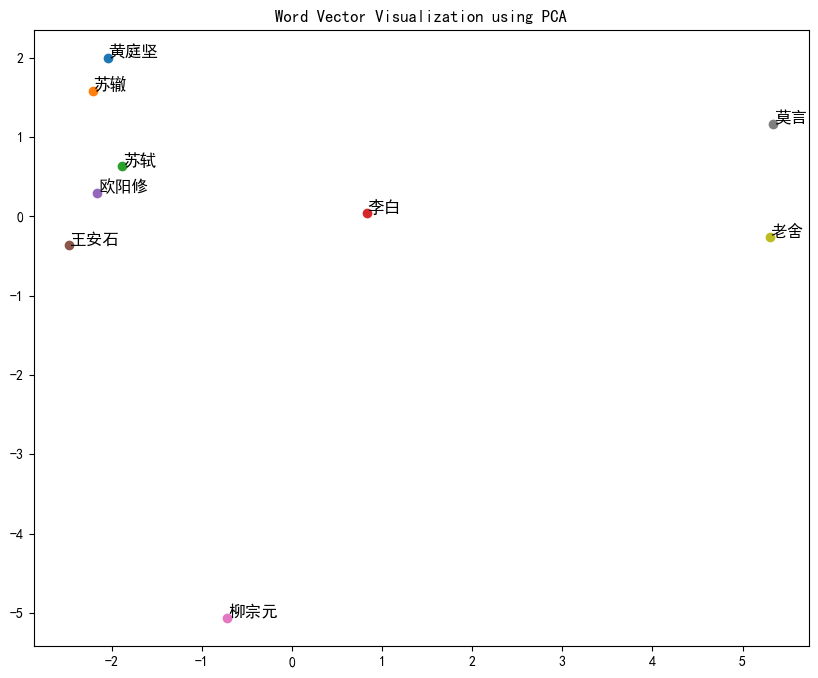

In [25]:
# 词向量可以通过降维算法（如 PCA ）进行可视化，以观察词语的分布。
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # 确保导入 PCA
import matplotlib.pyplot as plt

# 设置支持中文的字体路径（这里以 SimHei 为例）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 2. 选择要可视化的词
words = ['黄庭坚', '苏辙', '苏轼', '李白', '欧阳修', '王安石', '柳宗元', '莫言', '老舍']
word_vectors = np.array([keyed_vectors[word] for word in words])

# 3. 使用 PCA 降维到 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# 4. 绘制 PCA 可视化结果
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(pca_result[i, 0], pca_result[i, 1])
    plt.text(pca_result[i, 0] + 0.01, pca_result[i, 1] + 0.01, word, fontsize=12)
plt.title("Word Vector Visualization using PCA")
plt.show()

#### 推荐系统

**文本预处理（分词）**

In [26]:
import jieba

def get_average_vector(text, model):
    words = jieba.lcut(text)  # 使用 jieba 分词
    vectors = [model[word] for word in words if word in model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

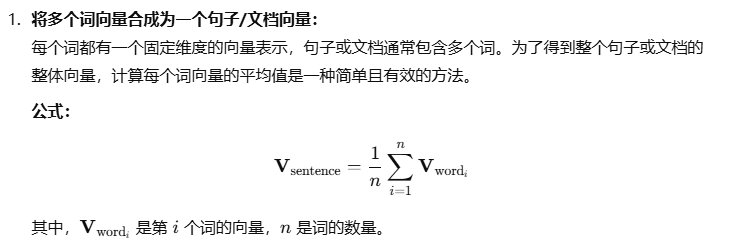

**计算用户兴趣与商品描述的向量**

In [28]:
# 示例商品描述
item_descriptions = {
    '商品1': '新鲜水果 苹果 香蕉',
    '商品2': '橙汁 富含维生素',
    '商品3': '健康零食 坚果'
}

# 用户兴趣描述
user_interest = '我喜欢吃新鲜的水果和橙汁'

# 计算用户向量和商品向量
user_vector = get_average_vector(user_interest, keyed_vectors)
print(user_vector)
item_vectors = {item: get_average_vector(desc, keyed_vectors) for item, desc in item_descriptions.items()}
print(item_vectors)

[-0.12742338 -0.32602638 -0.02644675 -0.18502626 -0.24149227 -0.37385833
  0.07362975  0.50021815 -0.20664325 -0.015783    0.23009774 -0.29032874
  0.15809676  0.2448245   0.01499025  0.181647    0.6369427  -0.05565925
  0.03477838 -0.43363824  0.03673612  0.25455275 -0.319512    0.23265699
 -0.22321212  0.353644    0.06094888 -0.4099325   0.607245   -0.15098551
 -0.32560423 -0.01106563 -0.20212273  0.285726    0.16636625 -0.13030925
 -0.43172336  0.02141    -0.44416463  0.16262574  0.10884637  0.04067563
 -0.09349762  0.11379687  0.03414651 -0.37641537 -0.13310724  0.29382235
  0.07861087  0.3289916   0.03699938  0.209857    0.14657387  0.01187737
  0.01541362 -0.460976    0.03693438  0.17573576 -0.06383951  0.03799187
 -0.14216675  0.19057176 -0.14946564 -0.0371835  -0.19045101 -0.17280437
 -0.11713199 -0.216079   -0.426567    0.08997238  0.06689138  0.11404125
 -0.14577001  0.23775825 -0.44491935 -0.07461625 -0.15887287 -0.22307874
  0.29908866 -0.295178    0.23291212 -0.25596175 -0

**计算余弦相似度并推荐**

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

# 计算相似度
similarities = {item: cosine_similarity([user_vector], [vec])[0, 0] for item, vec in item_vectors.items()}

# 按相似度排序推荐
recommendations = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

print("推荐结果：", recommendations)

推荐结果： [('商品1', 0.7795865), ('商品3', 0.6719825), ('商品2', 0.6227551)]


### 训练词向量

#### 训练Ngram2vec模型

Ngram2vec是word2vec和fasttext的超集。它可以兼容各种上下文特征并且支持多种模型。

**数据预处理**

In [30]:
# 对于中文文本，通常需要分词后生成 n-gram
import jieba
from gensim.models import Word2Vec
from itertools import islice

# 生成 n-gram
def generate_ngrams(tokens, n):
    return [''.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

# 中文分词并生成 n-gram
def preprocess_text(text, n=2):
    tokens = list(jieba.cut(text))
    ngrams = []
    for i in range(1, n + 1):  # 从 unigram 到 n-gram
        ngrams.extend(generate_ngrams(tokens, i))
    return ngrams

# 示例文本
text = "今天的天气很好"
ngrams = preprocess_text(text, n=3)
print(ngrams)  # ['今天', '的天', '天气', '很好', '今天的', '的天气', '天气很', '很好', '今天的天气', '的天气很', '天气很好']

['今天', '的', '天气', '很', '好', '今天的', '的天气', '天气很', '很好', '今天的天气', '的天气很', '天气很好']


**训练Ngram2vec模型**

In [31]:
# Word2Vec通常用来从零开始训练词向量模型。需要提供一个分词后的语料库，模型会根据这些语料学习词的向量表示
from gensim.models import Word2Vec

# 假设你有一个包含多条文本的数据集
texts = ["今天的天气很好", "明天可能会下雨", "后天有大风"]

# 生成 n-grams 语料
corpus = [preprocess_text(text, n=3) for text in texts]

# 训练 Word2Vec 模型
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, sg=1)  # sg=1 表示使用skip-gram

# 查看某个词或 n-gram 的词向量
print(model.wv['天气很好'])  # 输出 '天气很好' 的词向量

[-1.9442164e-03 -5.2675214e-03  9.4471136e-03 -9.2987325e-03
  4.5039477e-03  5.4041781e-03 -1.4092624e-03  9.0070926e-03
  9.8853596e-03 -5.4750429e-03 -6.0210000e-03 -6.7469729e-03
 -7.8948820e-03 -3.0479168e-03 -5.5940272e-03 -8.3446801e-03
  7.8290224e-04  2.9946566e-03  6.4147436e-03 -2.6289499e-03
 -4.4534765e-03  1.2495709e-03  3.9146186e-04  8.1169987e-03
  1.8280029e-04  7.2315861e-03 -8.2645155e-03  8.4335366e-03
 -1.8889094e-03  8.7011540e-03 -7.6168370e-03  1.7963862e-03
  1.0564864e-03  4.6005251e-05 -5.1032533e-03 -9.2476979e-03
 -7.2642174e-03 -7.9511739e-03  1.9137275e-03  4.7846674e-04
 -1.8131376e-03  7.1201660e-03 -2.4756920e-03 -1.3473093e-03
 -8.9005642e-03 -9.9254129e-03  8.9493981e-03 -5.7539381e-03
 -6.3729975e-03  5.1994072e-03  6.6699935e-03 -6.8316413e-03
  9.5975993e-04 -6.0084737e-03  1.6473436e-03 -4.2892788e-03
 -3.4407973e-03  2.1856665e-03  8.6615775e-03  6.7281104e-03
 -9.6770572e-03 -5.6221043e-03  7.8803329e-03  1.9893574e-03
 -4.2560520e-03  5.98812

### 新增词向量

#### 微调Word2Vec模型

In [32]:
from gensim.models import Word2Vec, KeyedVectors
import jieba
import numpy as np

**加载预训练模型并初始化**

In [33]:
# 加载已有的词向量
keyed_vectors = KeyedVectors.load_word2vec_format("../../../../../data/03.nlp/chinese_word_vector/sgns.literature.word.bz2", binary=False,unicode_errors='ignore')
print(keyed_vectors)

# 初始化Word2Vec模型
model = Word2Vec(vector_size=keyed_vectors.vector_size, min_count=1)

# 构建模型词汇表并设置预训练向量
model.build_vocab([list(keyed_vectors.key_to_index.keys())])
model.wv.vectors = keyed_vectors.vectors

print(f"模型词汇表大小: {len(model.wv)}")

KeyedVectors<vector_size=300, 187959 keys>
模型词汇表大小: 187959


**添加新词及初始化向量**

In [34]:
# 新词及其向量
new_words = ["新词1", "新词2", "新词3", "曹宇宇"]
new_vectors = np.random.rand(len(new_words), model.vector_size)  # 随机初始化

# 批量添加新词和向量
model.wv.add_vectors(new_words, new_vectors)

print(f"批量添加新词后，词汇表大小: {len(model.wv)}")

批量添加新词后，词汇表大小: 187963


**准备新句子并分词**

In [35]:
# 新的原始句子
new_sentences_raw = [
    "新词1和新词2一起出现在句子中。",
    "我们需要使用新词3来构建句子。",
    "这是一个测试曹宇宇的例子。"
]

# 使用jieba分词
new_sentences = [list(jieba.cut(sentence)) for sentence in new_sentences_raw]

print("分词结果:", new_sentences)

分词结果: [['新词1', '和', '新词2', '一起', '出现', '在', '句子', '中', '。'], ['我们', '需要', '使用', '新词3', '来', '构建', '句子', '。'], ['这是', '一个', '测试', '曹宇宇', '的', '例子', '。']]


**将新词加入 jieba 词典**

In [36]:
jieba.add_word("新词1")
jieba.add_word("新词2")
jieba.add_word("新词3")
jieba.add_word("曹宇宇")

In [37]:
# 重新分词
new_sentences_raw = [
    "新词1和新词2一起出现在句子中。",
    "我们需要使用新词3来构建句子。",
    "这是一个测试曹宇宇的例子。"
]

# 使用jieba分词
new_sentences = list(set([word for sentence in new_sentences_raw for word in list(jieba.cut(sentence))]))

print("分词结果:", new_sentences)

分词结果: ['。', '和', '一个', '在', '我们', '的', '中', '新词3', '一起', '这是', '构建', '新词1', '来', '需要', '测试', '例子', '句子', '出现', '使用', '新词2', '曹宇宇']


**更新词汇表并微调模型**

In [38]:
# 更新词汇表（允许增量更新）
model.build_vocab(new_sentences, update=True)

# 微调模型
model.train(new_sentences, total_examples=len(new_sentences), epochs=model.epochs)

# 检查新词向量是否更新
print("曹宇宇的向量:", model.wv["曹宇宇"])

曹宇宇的向量: [3.29980373e-01 7.30873585e-01 2.92971700e-01 5.64321041e-01
 3.68437082e-01 3.86751115e-01 4.01851475e-01 3.19322824e-01
 3.42274874e-01 2.95619845e-01 2.99790889e-01 4.41387415e-01
 7.89327547e-02 6.03610039e-01 3.12251985e-01 3.09948456e-02
 2.27598056e-01 3.63873690e-01 7.61712074e-01 2.43430231e-02
 7.19334662e-01 2.94764280e-01 6.34404957e-01 7.86555648e-01
 3.31926703e-01 1.11653000e-01 5.56087852e-01 2.56867647e-01
 9.82688963e-01 9.85526860e-01 6.29051104e-02 5.17803311e-01
 5.40720105e-01 8.76866505e-02 9.31723416e-01 6.68048024e-01
 9.69977856e-01 6.59715950e-01 3.64980370e-01 1.69209361e-01
 2.26656601e-01 8.28345001e-01 3.37878734e-01 6.45072937e-01
 5.37315905e-01 5.17520905e-01 2.10467234e-01 3.03035136e-02
 1.05189972e-01 7.64145851e-01 8.12301636e-02 4.09797192e-01
 8.45335484e-01 5.03420055e-01 8.50746691e-01 6.09680414e-01
 7.30118677e-02 2.53818333e-01 1.50095969e-01 6.49440110e-01
 4.27656099e-02 4.24132794e-01 8.59337971e-02 7.72806585e-01
 6.41148984e-01 

**保存和加载模型**

In [39]:
# 保存模型
model.save("../outputs/pre_trained_models/fine_tuned_word2vec.model")

# 加载模型
new_model = Word2Vec.load("../outputs/pre_trained_models/fine_tuned_word2vec.model")

**查看新词的关联词语**

In [40]:
# 查看新词1的最相似词语（默认返回前10个）
similar_words = model.wv.most_similar("曹宇宇", topn=10)

# 打印结果
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

新词3: 0.7346
新词2: 0.7262
新词1: 0.7136
枫丹白露: 0.2573
旧世界: 0.2513
不象: 0.2410
一以贯之: 0.2371
代沟: 0.2303
股份制: 0.2219
这行: 0.2216


**计算两个词的相似度**

In [41]:
similarity = model.wv.similarity("曹宇宇", "苏轼")
print(f"曹宇宇 和 苏轼 的相似度: {similarity:.4f}")

曹宇宇 和 苏轼 的相似度: 0.0853


**反向查找（排除干扰词）**

结合 正向词 和 负向词，可以精确查找与特定语义相关的词

In [42]:
# 查找与新词1相关但远离新词3的词，可以同时指定负向词，排除它们的影响
similar_words_negative = model.wv.most_similar(positive=["新词1"], negative=["新词3"], topn=10)

for word, similarity in similar_words_negative:
    print(f"{word}: {similarity:.4f}")

伊蓝: 0.1828
红袖: 0.1802
此间: 0.1711
林杨: 0.1708
接踵: 0.1695
park: 0.1666
报上来: 0.1635
杜小奉: 0.1626
医疗事故: 0.1622
哈里斯: 0.1612


### 应用场景

构建好特定的词向量后，就可以在许多自然语言处理（NLP）任务中应用它们，特别是与文本理解、分类、生成等相关的任务。以下是具体的应用场景及示例：

- 文本相似度计算  
应用场景：检测文本之间的语义相似性，例如搜索引擎、去重、推荐系统等。

- 文本分类  
应用场景：将文本分类为特定主题或情感标签，例如垃圾邮件检测、情感分析等。

- 关键词提取与文本摘要  
应用场景：提取文本中的重要词汇，生成简要摘要。

- 问答系统与聊天机器人  
应用场景：通过词向量捕捉用户意图，为问答系统或对话系统提供支持。

- 信息检索与推荐系统  
应用场景：根据用户查询推荐相关文档、商品或内容。

- 句子生成与文本生成  
应用场景：使用词向量作为生成模型的输入特征，生成新文本。

- 情感分析与观点挖掘  
应用场景：分析用户评论、社交媒体文本中的情感倾向。

- 聚类与主题建模  
应用场景：对文本进行无监督聚类，发现文本中的隐含主题。

- 知识图谱与关系抽取  
应用场景：通过词向量和实体链接，构建实体之间的关系网络。

- 命名实体识别（NER）与词性标注（POS Tagging）  
应用场景：在文本中标注实体或词性。

## FastText

FastText 是由 Facebook 开发的一种词嵌入工具，可以高效地生成词向量，并支持 OOV（Out of Vocabulary）词的表示。它通过子词（subword）的方式，将每个词分解为多个 n-grams，从而为词向量提供更丰富的信息。FastText 支持多种语言，包括中文。

中文模型的特点  
支持中文分词：需要在输入之前对文本进行分词。  
处理 OOV 词：通过 subword n-grams 来生成 OOV 词的向量。

**处理未登录词（OOV, Out of Vocabulary）时，FastText 相较于传统词嵌入方法（如 Word2Vec）有独特优势，因为它通过 subword n-grams 技术生成词向量，即使对于未登录词也能生成合理的向量表示**。

Subword n-grams 技术是 FastText 采用的一种方法，用于处理词汇表外的（OOV）词语。它的核心思想是将词语分解为更小的单元，如字符级的 n-grams（即连续的字符序列）。这样即使某个词汇在训练时没有出现过，FastText 仍然可以通过组合其子单元（subwords）来推测出词语的向量表示。

详细解释：  
Subword：指的是比单词更小的语言单位，在 FastText 中通常是字符级的子串。对于一个词语，FastText 会将其分解成多个 subword，例如对于词 "apple"，可以分解成：<ap, app, pple, ple, le>, 其中 < 和 > 是特殊的标记，用来表示词语的开始和结束。

n-grams：是指由连续 n 个字符组成的片段。例如，apple 可以产生以下 3-gram（即 n=3）subwords：app, pple，以及 4-gram subwords：appl, pple。

优势：  
增强的词表示：通过分解为子词（subwords），FastText 能更好地捕捉到词的形态信息，尤其是当词语是由多个词根或词缀构成时（如英语中的 "unhappy" 或 "running"）。  
OOV 词的处理：对于未登录词，FastText 不需要依赖词汇表中的词向量，而是通过其子词的向量组合来生成表示，因此即使一个词在训练数据中未出现，FastText 也能有效地生成它的词向量。

举个例子：  
假设训练数据中没有出现过词 "biological"。传统的基于词的嵌入方法（如 Word2Vec）将无法为 "biological" 生成词向量，但 FastText 可以将 "biological" 拆分为多个 subword 片段（如 bi, io, ol, ic, al），然后使用这些 subwords 的词向量来组合成一个合理的表示。

这种方法大大提升了词嵌入模型的泛化能力，尤其是在面对新词或拼写变化时。

### 训练词向量

In [7]:
from gensim.models import FastText
import pandas as pd
import jieba

In [3]:
# 加载语料，酒店评论
data = pd.read_csv('../../../../../data/03.nlp/ChineseNlpCorpus/datasets/ChnSentiCorp_htl_all/ChnSentiCorp_htl_all.csv')

In [4]:
data

,label,review
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风"
...,...,...
7761,0,尼斯酒店的几大特点：噪音大、环境差、配置低、服务效率低。如：1、隔壁歌厅的声音闹至午夜3点许...
7762,0,盐城来了很多次，第一次住盐阜宾馆，我的确很失望整个墙壁黑咕隆咚的，好像被烟熏过一样家具非常的...
7763,0,看照片觉得还挺不错的，又是4星级的，但入住以后除了后悔没有别的，房间挺大但空空的，早餐是有但...
7764,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...


In [21]:
# import pandas as pd
# import jieba
# import os

# # 确保 tofiledir 的路径存在
# tofiledir = '../data'
# os.makedirs(tofiledir, exist_ok=True)

# # 文件路径拼接
# file_path = os.path.join(tofiledir, 'ChnSentiCorp_htl_all.txt')

# # 替换 NaN 为空字符串
# data['review'] = data['review'].fillna('')

# # 写入文件
# with open(file_path, 'w', encoding='utf-8') as f:
#     f.writelines([
#         ' '.join(jieba.lcut(data['review'][row])) + '\n'
#         for row in range(len(data))
#     ])

In [63]:
stopwords = set(['，', '。', '的', '了', '是', '.', ',', '!'])  # 停用词示例，可扩展

# 去除停用词和标点
sentences = [
    [word for word in jieba.lcut(str(data['review'][row]).strip()) if word not in stopwords]
    for row in range(len(data))
    if isinstance(data['review'][row], str)
]

In [1]:
# sentences

In [65]:
# 训练模型
model = FastText(sentences, vector_size=100, window=5, min_count=5, epochs=100)

# 保存模型
model.save("../../../../../data/03.nlp/chinese_word_vector/fasttext_model.bin")

参数解释：

sentences: 输入的分词句子列表。  
vector_size: 词向量的维度。  
window: 上下文窗口大小。  
min_count: 忽略出现次数低于 min_count 的词。  
epochs: 训练迭代次数。

In [66]:
# 加载已保存的模型
model = FastText.load("../../../../../data/03.nlp/chinese_word_vector/fasttext_model.bin")

In [67]:
vector = model.wv['学习']
print(vector)

[-0.90930265  0.19486374 -0.48736227  0.11025494  0.97824323  0.21062896
 -0.4758327   0.14311588  0.17666912  1.0706086   0.76389337  0.5215527
 -0.59919024  0.16306224  0.8761897   0.44339097  2.1068108   0.2552482
  0.05233251 -0.44967186 -0.72659105 -0.4911699   1.1331394  -0.06913687
 -0.80430865  1.0947895  -2.199906   -0.8519644  -0.79242253  0.4001627
  0.90641904 -0.51793677 -1.4949744  -0.19816566 -0.2855605   0.5881876
  0.21560802  1.0454751   0.6425472  -0.01765039 -0.05922691  0.9104178
  0.9845321   0.22196817  0.46749234  0.91567004 -0.02953023 -0.558129
  1.6336185  -0.9540125   0.3179003  -1.6132997   0.10880894 -0.13103122
  0.7211361   0.71714616  0.9826683  -1.2177274  -0.41873625 -0.8672011
  2.1194277   0.04123785  0.9211392   0.46840137 -1.1062453  -0.7582157
 -1.630701   -0.8624141  -0.61429536 -1.5151553  -0.64808196 -1.3909968
 -0.1370362  -0.43211722 -0.8235804  -1.2309115   1.2142437   1.259235
 -1.5388482   1.0170562   2.1037612  -0.7196597   0.83817333 -0

In [68]:
oov_vector = model.wv['未登录词']
print(oov_vector)

[ 2.4565705e-04 -5.6538789e-04 -2.0271793e-03  5.3970783e-04
 -1.2125804e-03  3.8117480e-03 -2.6165347e-03 -4.2880536e-05
 -2.1162045e-03  1.5049269e-03  9.3532761e-04 -1.3432067e-03
  1.3313700e-03 -6.2272826e-04 -2.4471977e-03 -1.1351410e-03
 -8.4174892e-05 -1.4581823e-03  6.2694484e-03 -2.1029238e-03
 -3.2388465e-04 -2.3173075e-03 -2.0266478e-03  2.7400037e-04
 -1.2204037e-04  3.6775408e-04 -1.0231559e-03 -5.6371430e-04
  7.4347091e-04  1.0294139e-03  2.7141701e-03 -1.2058879e-03
  1.7440155e-03  2.9534050e-03  8.2953091e-05 -1.0847345e-03
  2.1844490e-03 -1.0738557e-03 -8.9931862e-05 -1.1580617e-03
  1.6765231e-04  3.4824369e-04  1.3919368e-03 -2.7712583e-04
  1.4813275e-03 -1.5644009e-03 -1.1693847e-03  1.2304479e-03
  1.6292839e-03 -2.0875479e-03 -1.1989346e-03 -8.9265686e-04
 -3.4146397e-03 -1.4754438e-03 -8.7903411e-04 -2.9223156e-03
 -2.0600413e-03  5.7839544e-04 -7.5801931e-05 -2.5629555e-04
  2.4792427e-04 -1.7140934e-03  3.1190747e-04 -4.7961497e-03
 -1.7866585e-03 -3.45126

In [69]:
similar_words = model.wv.most_similar('酒店', topn=5)
similar_words

[('宾馆', 0.6888862252235413),
 ('饭店', 0.6153952479362488),
 ('城市', 0.5281608700752258),
 ('酒店式', 0.46642056107521057),
 ('店', 0.46016383171081543)]

## GloVe

GloVe（Global Vectors for Word Representation）是一个用于生成词向量的无监督学习算法，它可以将单词表示为密集的向量，从而捕捉单词的语义信息。GloVe由斯坦福大学的研究人员开发，旨在通过全局和局部统计信息来表示单词的语义。

GloVe的关键特性：  
共现矩阵：GloVe利用单词共现矩阵（记录单词在语料库中共同出现的频率）作为输入数据。共现矩阵是基于一个窗口内的单词对出现频率统计的。

矩阵分解：GloVe通过矩阵分解来生成低维的向量，这种方法类似于Word2Vec，但它结合了全局统计信息，区别于Word2Vec这种主要依赖局部上下文窗口的模型。

目标函数：GloVe的目标是学习向量，使得它们的点积可以逼近单词共现概率的对数值。

计算效率：相较于像Word2Vec这样的模型，GloVe在处理大规模数据集时更为高效，因为它依赖于矩阵分解技术，而不是像Word2Vec那样使用随机梯度下降。

GloVe的优势：  
全局上下文：与只利用局部上下文的Word2Vec不同，GloVe能够捕捉到全局的单词关系，因此其表示的语义信息更加丰富。
预训练模型：GloVe提供了预训练好的词向量，可以直接在不同的自然语言处理任务中使用，减少了训练时间。

### 预训练词向量

In [7]:
from gensim.models import KeyedVectors

# 直接加载 GloVe 文件，注意将 no_header 设置为 True
glove_file = '../../../../../data/03.nlp/english_word_vector/glove.6B.300d.txt'
model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

# 示例：获取某个词的相似词
similar_words = model.most_similar('king')
print(similar_words)

[('queen', 0.6336469054222107), ('prince', 0.6196622848510742), ('monarch', 0.5899620652198792), ('kingdom', 0.5791266560554504), ('throne', 0.5606487989425659), ('ii', 0.5562329292297363), ('iii', 0.5503199100494385), ('crown', 0.5224862694740295), ('reign', 0.5217353701591492), ('kings', 0.5066401958465576)]


In [8]:
model['king'] # 获取某个词的词向量

array([ 0.0033901, -0.34614  ,  0.28144  ,  0.48382  ,  0.59469  ,
        0.012965 ,  0.53982  ,  0.48233  ,  0.21463  , -1.0249   ,
       -0.34788  , -0.79001  , -0.15084  ,  0.61374  ,  0.042811 ,
        0.19323  ,  0.25462  ,  0.32528  ,  0.05698  ,  0.063253 ,
       -0.49439  ,  0.47337  , -0.16761  ,  0.045594 ,  0.30451  ,
       -0.35416  , -0.34583  , -0.20118  ,  0.25511  ,  0.091111 ,
        0.014651 , -0.017541 , -0.23854  ,  0.48215  , -0.9145   ,
       -0.36235  ,  0.34736  ,  0.028639 , -0.027065 , -0.036481 ,
       -0.067391 , -0.23452  , -0.13772  ,  0.33951  ,  0.13415  ,
       -0.1342   ,  0.47856  , -0.1842   ,  0.10705  , -0.45834  ,
       -0.36085  , -0.22595  ,  0.32881  , -0.13643  ,  0.23128  ,
        0.34269  ,  0.42344  ,  0.47057  ,  0.479    ,  0.074639 ,
        0.3344   ,  0.10714  , -0.13289  ,  0.58734  ,  0.38616  ,
       -0.52238  , -0.22028  , -0.072322 ,  0.32269  ,  0.44226  ,
       -0.037382 ,  0.18324  ,  0.058082 ,  0.26938  ,  0.3620

# 动态词向量模型

## ELMo

ELMo（Embeddings from Language Models） 是一种用于自然语言处理的预训练词表示模型，最早由 AllenNLP 团队于 2018 年提出。ELMo 通过深度双向语言模型（BiLSTM）生成上下文相关的词向量，是自然语言理解任务中的重要里程碑。

1. ELMo的核心思想   
    ELMo 的关键特性是生成 上下文相关的词向量，与传统的静态词向量（如Word2Vec、GloVe）不同。每个词的向量表示不仅依赖于该词本身，还依赖于它在当前句子中的上下文环境。
    
    例如：
    
    在句子 “我去银行存钱” 中，银行 表示“金融机构”。  
    在句子 “我在河边的银行散步” 中，银行 表示“河岸”。  
    在这两个句子中，传统的词向量方法会为“银行”生成相同的词向量，而 ELMo 则能够根据上下文，生成两个不同的向量，捕捉到语义上的差异。

2. ELMo模型结构  
    ELMo 基于 双向语言模型 (BiLM)，其核心网络结构是由两个双向 LSTM 层构成。
    
    模型架构：  
    输入层：字符级嵌入
    
    ELMo 不直接使用单词级嵌入，而是通过字符级卷积神经网络（CNN）从单词的字符表示中提取信息。  
    这样做的好处是能够更好地处理未登录词（Out-of-Vocabulary, OOV）和拼写变体。  
    双向语言模型 (BiLSTM)  
    
    前向 LSTM：从左到右预测下一个词。  
    后向 LSTM：从右到左预测上一个词。  
    每个方向的 LSTM 都会生成一系列词向量。  
    输出层：词向量组合  
    
    输出的词向量是前向和后向语言模型的加权组合。  
    ELMo 输出每一层的隐藏状态，并根据任务的不同，学习到每一层的权重，得到上下文敏感的词向量。

   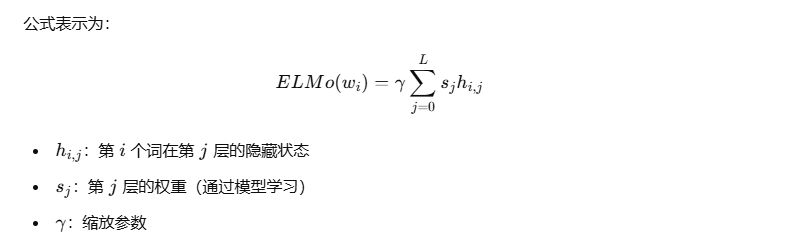

4. ELMo的特点与优势  
    上下文敏感：根据句子上下文生成动态词向量。  
    深度特征表示：通过多层 LSTM，学习到深层次的语言结构。  
    迁移学习能力强：可以将预训练的 ELMo 表示迁移到其他 NLP 任务，如命名实体识别（NER）、情感分析和机器阅读理解等。  
    字符级建模：增强了对未登录词和拼写变体的处理能力。

5. ELMo的应用与影响  
    ELMo 在多个 NLP 任务上显著提高了性能：
    
    问答系统（如SQuAD）  
    文本分类与情感分析  
    命名实体识别（NER）  
    自然语言推理（NLI）  
    语义角色标注（SRL）  
    ELMo 的引入使得 NLP 模型性能在多个基准数据集上取得了重大提升，推动了预训练词表示技术的发展。


6. ELMo的局限性与后续发展  
    虽然 ELMo 在语义建模方面取得了巨大成功，但它也有一些局限性：
    
    依赖双向 LSTM：模型结构复杂，训练时间长，推理速度慢。  
    无注意力机制：不能像 Transformer 那样灵活建模长距离依赖。  
    预训练成本高：需要大规模语料库进行训练。  
    因此，基于 Transformer 的 BERT、GPT 和 T5 等模型随后在语言模型领域迅速崛起，逐渐取代了 ELMo 的主流地位。

## BERT

BERT（Bidirectional Encoder Representations from Transformers）在中文文本中表现非常出色，尤其在处理上下文相关的词向量时。BERT的中文模型能够为每个词生成动态的、基于上下文的词向量。这种词向量不仅能捕捉词的基本语义，还能体现其在特定句子中的含义。

### 预训练词向量

#### bert-base-chinese

In [1]:
from transformers import BertTokenizer, BertModel
import torch
import warnings
warnings.filterwarnings("ignore")

# 加载预训练的BERT模型和分词器
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
model = BertModel.from_pretrained('bert-base-chinese')

# 输入句子
text = "今天天气很好"
inputs = tokenizer(text, return_tensors="pt")
print("Tokens:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

# 提取词向量
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

print(last_hidden_states.shape)  # (batch_size, sequence_length, hidden_size)

Tokens: ['[CLS]', '今', '天', '天', '气', '很', '好', '[SEP]']
torch.Size([1, 8, 768])


#### chinese-bert-wwm

chinese-bert-wwm在huggingface官网直接下载，[地址](https://huggingface.co/hfl/chinese-bert-wwm/tree/main)

In [2]:
# Chinese-BERT-wwm预训练模型
path = '../../../../../data/03.nlp/chinese_word_vector/chinese_wwm_pytorch'
tokenizer = BertTokenizer.from_pretrained(path)
model = BertModel.from_pretrained(path)

# 输入句子
text = "今天天气很好"
inputs = tokenizer(text, return_tensors="pt")
print(inputs)
print("Tokens:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

# 提取词向量
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

print(last_hidden_states.shape)  # (batch_size, sequence_length, hidden_size)

{'input_ids': tensor([[ 101,  791, 1921, 1921, 3698, 2523, 1962,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
Tokens: ['[CLS]', '今', '天', '天', '气', '很', '好', '[SEP]']
torch.Size([1, 8, 768])


### nn.Embedding

nn.Embedding 是 PyTorch 中的一个模块，用于创建嵌入层，通常用于自然语言处理 (NLP) 和推荐系统中的词嵌入 (Word Embedding)。

功能概述  
nn.Embedding 将输入的索引映射到高维稠密向量，常用于将离散标记（如单词索引）转换为连续向量。

embedding = nn.Embedding(num_embeddings, embedding_dim)  
参数说明  
num_embeddings: 词表大小，即嵌入矩阵的行数。  
embedding_dim: 嵌入向量的维度，即嵌入矩阵的列数。  
可选参数  
padding_idx: 指定用于填充的索引，其嵌入向量会被置为零。  
max_norm: 如果设置，则嵌入向量的范数会被限制到该值。  
norm_type: 默认为 2，指定范数类型。  
scale_grad_by_freq: 如果为 True，则根据单词在批次中的频率缩放梯度。  
sparse: 如果为 True，使用稀疏梯度，节省内存和计算。  

In [3]:
import torch
import torch.nn as nn

num_embeddings = tokenizer.vocab_size
embedding_dim = 256
embedding = nn.Embedding(num_embeddings, embedding_dim)

In [5]:
inputs['input_ids'] # 词表索引

tensor([[ 101,  791, 1921, 1921, 3698, 2523, 1962,  102]])

In [6]:
embedded = embedding(inputs['input_ids']) # 索引转换为连续向量
embedded

tensor([[[-0.4334,  0.4525,  0.4021,  ..., -0.7657,  0.2812,  0.1369],
         [-0.6749, -0.3600,  1.1044,  ...,  0.2796, -0.2602, -0.2314],
         [ 0.3639, -0.5260,  0.5839,  ...,  1.7234,  0.9505, -0.6024],
         ...,
         [ 0.4795, -1.3285,  0.5501,  ..., -0.1594, -0.0661,  1.6018],
         [-2.3079, -1.1334, -0.5685,  ..., -0.7370, -1.9190,  0.9961],
         [ 0.7377,  1.3309, -0.7064,  ..., -0.3735, -1.7137, -0.8744]]],
       grad_fn=<EmbeddingBackward0>)